### Dependencies

!pip install lime

!pip install tensorflow

!pip install numpy scipy matplotlib

!pip install opencv-python

!pip install scikit-image

Codesource:  
https://github.com/marcotcr/lime

In [3]:
import sys
sys.path.append("../Library")

from tubecam.tensorflow_utils import load_session_with_graph
from tubecam.tensorflow_utils import predict
from tubecam.image_utils import get_and_preprocess_image

from lime import lime_image
import cv2
import time

def get_explanation(graph_path, image_path):
    image_data=get_and_preprocess_image(image_path)
    
    explainer = lime_image.LimeImageExplainer()
    starttimer = time.time()
    with load_session_with_graph(graph_path) as sess:
        def predict_fn(image_data):
            return predict(sess, [image_data[0]])
        # Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
        explanation = explainer.explain_instance(image_data, predict_fn, batch_size=1, top_labels=6, hide_color=0, num_samples=1000)
    print("Took {0!s} seconds.".format(time.time() - starttimer))
    return explanation

from skimage.segmentation import mark_boundaries
%matplotlib inline
import matplotlib.pyplot as plt
def plot_lime(explanation, class_label):
    # num_features=5 ist die anzahl der superpixel
    # erste argument hier (209) enspricht der richtigen klasse 
    plt.figure(figsize=(10, 10)) 
    plt.subplot(221)
    temp, mask = explanation.get_image_and_mask(class_label, positive_only=True, num_features=5, hide_rest=True)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

    plt.subplot(222)
    temp, mask = explanation.get_image_and_mask(class_label , positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    
    plt.subplot(223)
    temp, mask = explanation.get_image_and_mask(class_label, positive_only=False, num_features=5, hide_rest=False)
    image = mark_boundaries(temp / 2 + 0.5, mask)
    plt.imshow(image)
    
    plt.subplot(224)
    temp, mask = explanation.get_image_and_mask(class_label, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.02)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

On Lime
Took 193.182397127 seconds.


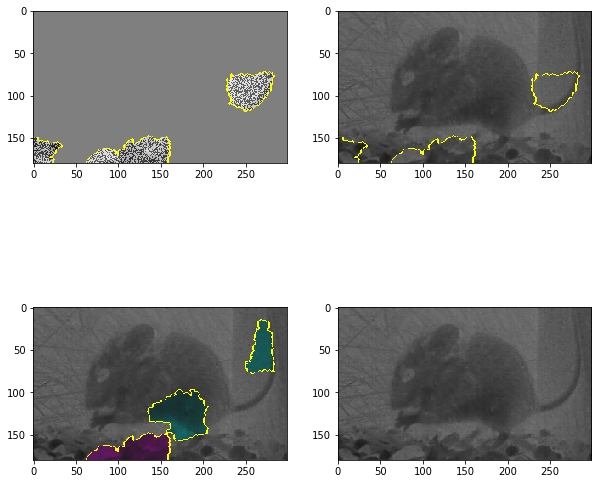

In [4]:
#Lime
print("On Lime")
#Our class labels are: 0 = Apodemus sp, 1 = Microtus Agrestis, 2 = Mustela, 3 = Myodes Glareolus, 4 = Sorex
graph_path = "../Training/Models/retrained_graph_5_classes_50k.pb"

image_path = '../Resources/Pictures/Test/testset/no_google/apodemus sp/EK000009.AVI_17_1.jpg'

explanation = get_explanation(graph_path, image_path)
plot_lime(explanation, 0)